In [95]:
# poetry install
# poetry config virtualenvs.in-project true
# Select kernel -> .venv

In [96]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib

# print the JS visualization code to the notebook
shap.initjs()

In [97]:
# テスト用のデータセットを取得.
org_X = pd.read_csv("アジ_df.csv")
X = org_X.drop(["年月日", "一人あたりアジ"], axis=1)

In [98]:
# データ件数
len(X)

2052

In [99]:
# 作成された model の feature name などを見てみる
model = pickle.load(open('アジ_lgbm.pkl', 'rb'))
m = model.dump_model()
m["feature_names"]

['平均気温(℃)',
 '降水量の合計(mm)',
 '日照時間(時間)',
 '最高気温(℃)',
 '最低気温(℃)',
 '合計全天日射量(MJ/㎡)',
 '平均風速(m/s)',
 '最大風速(m/s)',
 '最大瞬間風速(m/s)',
 '平均湿度(％)',
 '最小相対湿度(％)',
 '平均蒸気圧(hPa)',
 '平均現地気圧(hPa)',
 '平均海面気圧(hPa)',
 '最低海面気圧(hPa)',
 '平均雲量(10分比)',
 '10分間降水量の最大(mm)',
 '最深積雪(cm)',
 '降雪量合計(cm)',
 '水温',
 '平均気温(℃)_前日',
 '平均気温(℃)_前日増',
 '平均気温(℃)_前日増増',
 '平均気温(℃)_7日間平均',
 '平均気温(℃)_14日間平均',
 '平均気温(℃)_28日間平均',
 '降水量の合計(mm)_前日',
 '降水量の合計(mm)_前日増',
 '降水量の合計(mm)_前日増増',
 '降水量の合計(mm)_7日間平均',
 '降水量の合計(mm)_14日間平均',
 '降水量の合計(mm)_28日間平均',
 '日照時間(時間)_前日',
 '日照時間(時間)_前日増',
 '日照時間(時間)_前日増増',
 '日照時間(時間)_7日間平均',
 '日照時間(時間)_14日間平均',
 '日照時間(時間)_28日間平均',
 '最高気温(℃)_前日',
 '最高気温(℃)_前日増',
 '最高気温(℃)_前日増増',
 '最高気温(℃)_7日間平均',
 '最高気温(℃)_14日間平均',
 '最高気温(℃)_28日間平均',
 '最低気温(℃)_前日',
 '最低気温(℃)_前日増',
 '最低気温(℃)_前日増増',
 '最低気温(℃)_7日間平均',
 '最低気温(℃)_14日間平均',
 '最低気温(℃)_28日間平均',
 '合計全天日射量(MJ/㎡)_前日',
 '合計全天日射量(MJ/㎡)_前日増',
 '合計全天日射量(MJ/㎡)_前日増増',
 '合計全天日射量(MJ/㎡)_7日間平均',
 '合計全天日射量(MJ/㎡)_14日間平均',
 '合計全天日射量(MJ/㎡)_28日間平均',
 '平均風速(m/s)_前日',
 '平均風速(m/s)_前日増'

In [100]:
# create shap explainer 
# 入力として X は必要. 後で X の部分集合でやってみよう
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [101]:
# shap_values の 中身を見てみる.
print(f'{len(shap_values)=}') # 2052 regresssor  じゃないときは全データ系列が入るようだ
print(f'{len(shap_values[0])=}') # feature数
print(f'{len(shap_values[1])=}') # feature数


len(shap_values)=2052
len(shap_values[0])=836
len(shap_values[1])=836


In [102]:
explainer.expected_value # 一人あたりアジの期待値

2.167689117025263

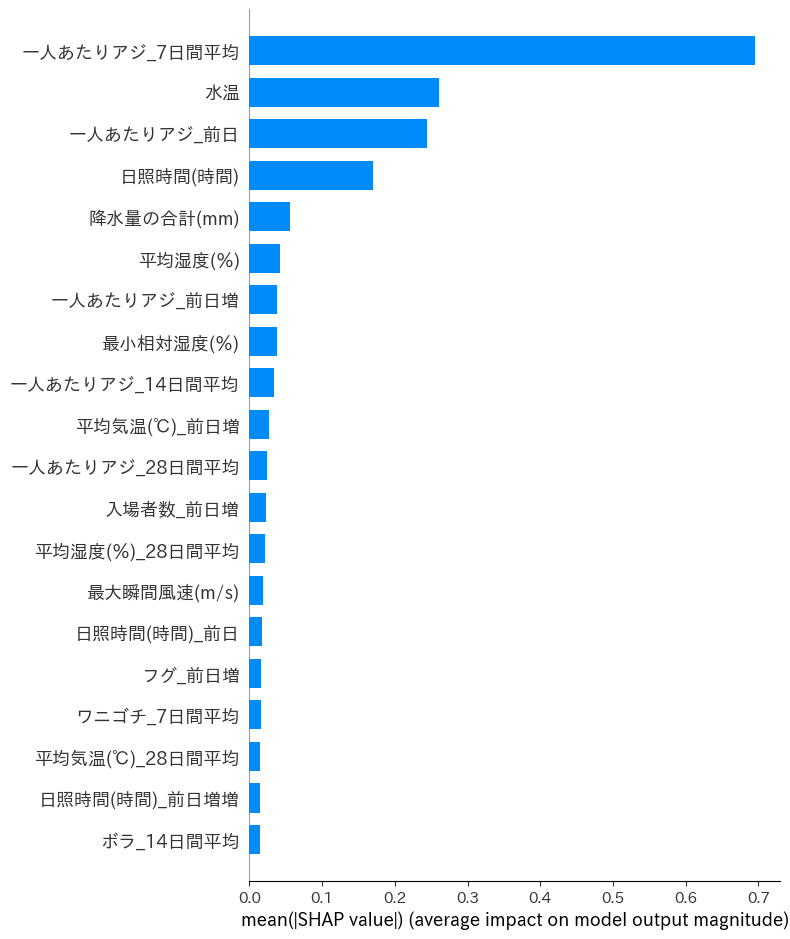

In [103]:
shap.summary_plot(shap_values, X, plot_type="bar")


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


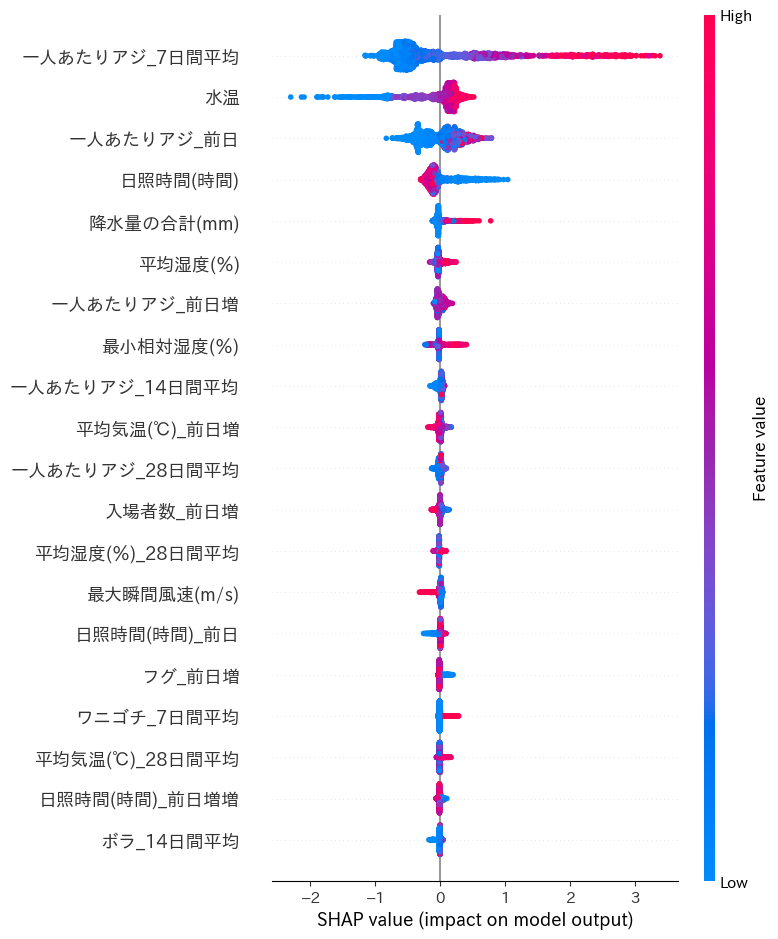

In [104]:
shap.summary_plot(shap_values, X)


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[2000:], X.iloc[2000:])


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[2000], X.iloc[2000])


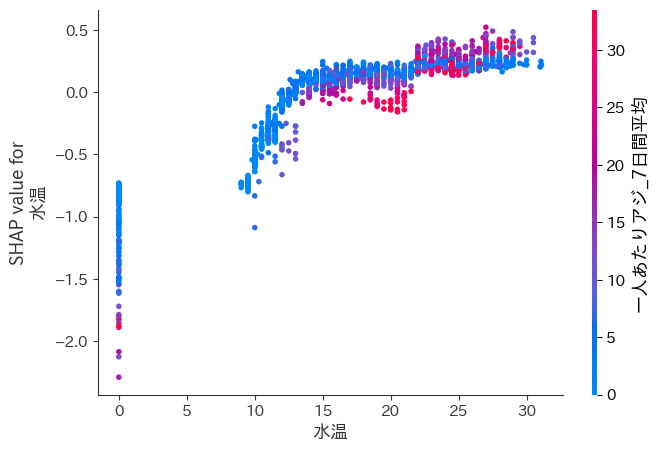

In [107]:
shap.dependence_plot("水温", shap_values, X)

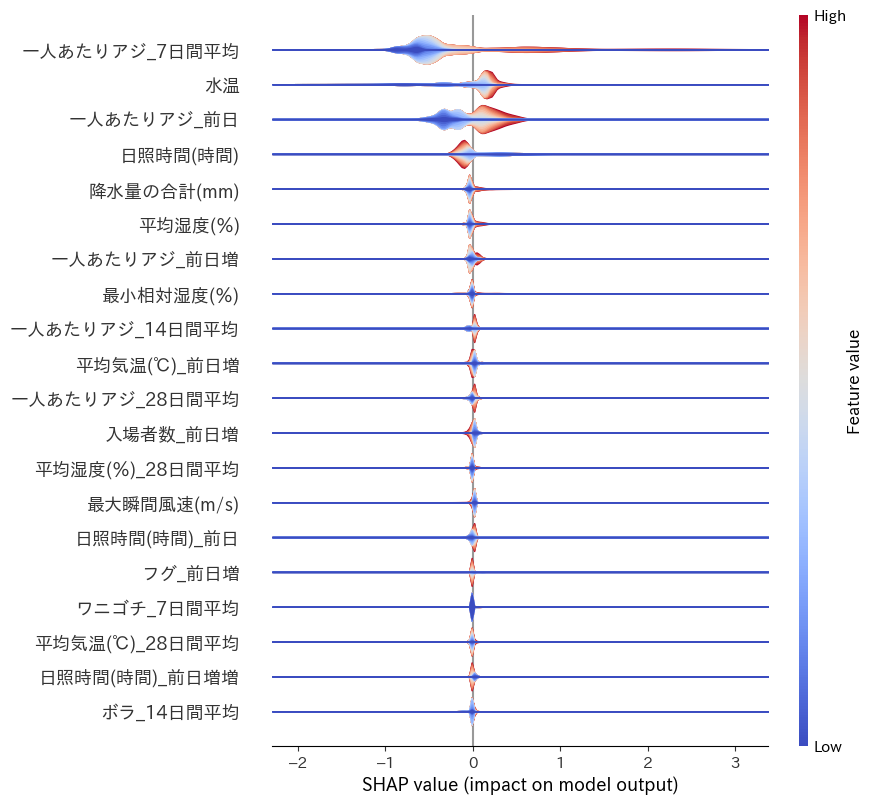

In [108]:
shap.plots.violin(
    shap_values, features=X, plot_type="layered_violin"
)

In [109]:
# explainer_shap_values = explainer(X)
# value と data に分かれた構造のオブジェクトが得られる、
# shap.plots.scatter(explainer_shap_values[:, "水温"])


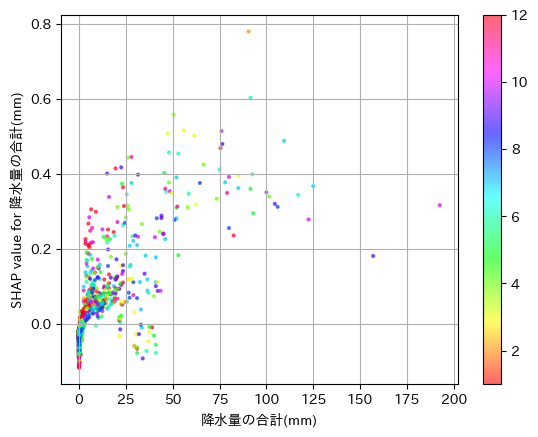

In [114]:
month = org_X["年月日"].apply(lambda x: int(x.split("-")[1]))

# name = "一人あたりアジ_7日間平均"
# name = "日照時間(時間)"
name = "水温"
# name = "降水量の合計(mm)"

plt.scatter(
    X[name], # 横軸
    shap_values[:,X.columns.get_loc(name)], # 縦軸
    s=4,
    alpha=0.6,
    c=month,
    cmap="hsv",
)
plt.xlabel(name)
plt.ylabel(f"SHAP value for {name}")
plt.grid(True)
plt.colorbar()

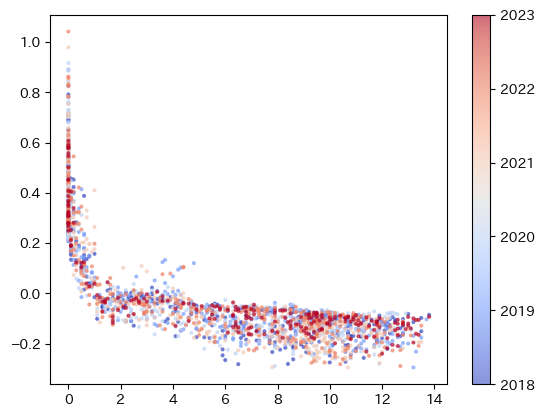

In [113]:
year = org_X["年月日"].apply(lambda x: int(x.split("-")[0]))

# name = "一人あたりアジ_7日間平均"
name = "日照時間(時間)"
# name = "水温"

plt.scatter(
    X[name], # 横軸
    shap_values[:,X.columns.get_loc(name)], # 縦軸
    s=4,
    alpha=0.6,
    c=year,
    cmap="coolwarm",
)
plt.colorbar()